In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#lets read our csv files

In [47]:
US = pd.read_csv('USvideos.csv')
US_category = pd.read_json('US_category_id.json')

In [48]:
US.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


In [49]:
US['trending_date'] = pd.to_datetime(US['trending_date'],format='%y.%d.%m').dt.date

In [50]:
publish_time = pd.to_datetime(US['publish_time'],format = '%Y-%m-%dT%H:%M:%S.%fZ')

In [51]:
US['publish_date'] = publish

NameError: name 'publish' is not defined

In [53]:
US['publish date'] = publish_time.dt.date
US['publish time'] = publish_time.dt.time
US['publish hour'] = publish_time.dt.hour

In [64]:
categories = {category['id']:category['snippet']['title'] for category in US_category['items']}

In [65]:
US.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish date,publish time,publish hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17:13:01,17


In [67]:
US.insert(4,'category',US['category_id'].astype(str).map(categories))

In [68]:
US.head(1)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish date,publish time,publish hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17:13:01,17


In [13]:
for cols in in_col:
    videos[cols]=videos[cols].apply(pd.to_numeric,errors='coerce')
    

In [14]:
videos.fillna(0,inplace=True)

In [15]:
videos['likes']=videos['likes'].astype(int)
videos['views']=videos['views'].astype(int)
videos['dislikes']=videos['dislikes'].astype(int)

In [16]:
corr=['category_id','comment_count',"views","likes","dislikes"]

In [17]:
videos_corr = videos[corr].corr()

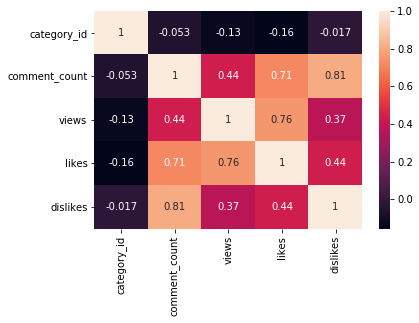

In [18]:
sns.heatmap(videos_corr,annot=True)

In [29]:
top_views = videos.sort_values('views',ascending=False).head(10)

In [36]:
youtube_col=['thumbnail_link','views','title']

In [48]:
import urllib.request
from PIL import Image


In [74]:
from IPython.display import HTML, display
import sys
# We choose the 10 most trending videos
selected_columns = ['title', 'channel_title', 'thumbnail_link', 'publish date', 'category']

most_frequent = US.groupby(selected_columns)['video_id'].agg(
    {"code_count": len}).sort_values(
    "code_count", ascending=False
).head(10).reset_index()

# Construction of HTML table with miniature photos assigned to the most popular movies
table_content = ''
max_title_length = 50

for date, row in most_frequent.T.iteritems():
    HTML_row = '<tr>'
    HTML_row += '<td><img src="' + str(row[2]) + '"style="width:100px;height:100px;"></td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[0])  + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    
    table_content += HTML_row + '</tr>'
display(HTML(
    '<table><tr><th>Photo</th><th>Channel Name</th><th style="width:250px;">Title</th><th>Category</th><th>Publish Date</th></tr>{}</table>'.format(table_content))
)

/Users/SouSou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


Photo,Channel Name,Title,Category,Publish Date
,Lucas the Spider,Lucas the Spider - Polar Bear,Film & Animation,2018-03-04
,Illumination,The Grinch - Official Trailer (HD),Entertainment,2018-03-08
,CamilaCabelloVEVO,Camila Cabello - Never Be the Same,Music,2018-03-08
,ChrisYoungVEVO,Chris Young - Hangin' On,Music,2018-02-26
,Warner Bros. Pictures,TAG - Official Trailer 1,Entertainment,2018-03-20
,jacksfilms,*cough*,Comedy,2018-02-26
,Kensuke Koike,Top breeder 🐕,Film & Animation,2018-03-12
,Focus Features,WON'T YOU BE MY NEIGHBOR? - Official Trailer [HD] - In Select Theaters June 8,Entertainment,2018-03-20
,Lucas the Spider,Lucas the Spider - Encore,Film & Animation,2018-03-30
,What's Inside?,What's inside Pizza Ordering Shoes?,Sports,2018-03-17
